In [1]:
import glob
import numpy as np
import pandas as pd
import pickle as pkl
import sys

import networkx as nx
from plotnine import *

sys.path.append('../indices')
from utils import parse_metadata

In [2]:
with open('../data/networks/computational_biology.pkl', 'rb') as in_file:
    cb_network = pkl.load(in_file)

cb_network

In [3]:
len(cb_network.nodes)

196494

196494


-13.206491420980544

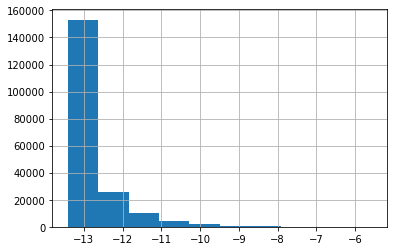

In [4]:
with open('../output/computational_biology-genetics-pagerank.pkl', 'rb') as in_file:
    cb_g_pageranks = pkl.load(in_file)
data_dict = {'doi': [], 'pagerank': []}

for doi, pagerank in cb_g_pageranks.items():
    data_dict['doi'].append(doi)
    data_dict['pagerank'].append(pagerank)

cb_df = pd.DataFrame(data_dict)
print(len(cb_df))

cb_df['log_pagerank'] = np.log(cb_df['pagerank'])
cb_df['log_pagerank'].hist()
cb_df['log_pagerank'].median()

195013


-13.191845251284777

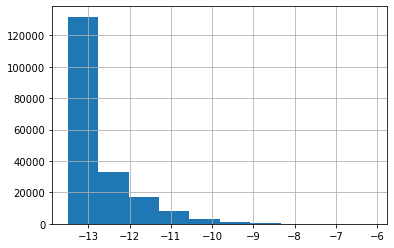

In [5]:
with open('../output/shuffle_results/computational_biology-genetics-42-pagerank.pkl', 'rb') as in_file:
    cb_g_pageranks = pkl.load(in_file)
data_dict = {'doi': [], 'pagerank': []}

for doi, pagerank in cb_g_pageranks.items():
    data_dict['doi'].append(doi)
    data_dict['pagerank'].append(pagerank)

shuffle_df = pd.DataFrame(data_dict)
print(len(shuffle_df))
shuffle_df['log_pagerank'] = np.log(shuffle_df['pagerank'])
shuffle_df['log_pagerank'].hist()
shuffle_df['log_pagerank'].median()

In [6]:
cb_df.sort_values(by='pagerank', ascending=True)

,doi,pagerank,log_pagerank
196493,10.3390/ijerph19042392,0.000001,-13.418357
152836,10.1186/s12885-019-6479-2,0.000001,-13.418357
110115,10.1159/000458154,0.000001,-13.418357
75909,10.1080/15548627.2018.1525476,0.000001,-13.418357
152830,10.1186/s12885-019-6309-6,0.000001,-13.418357
...,...,...,...
1096,10.1038/nature01511,0.002132,-6.150739
849,10.1093/bioinformatics/btp352,0.002403,-6.030857
6432,10.1146/annurev.genom.9.081307.164359,0.002494,-5.994017
1187,10.1126/science.1058040,0.003566,-5.636369


In [7]:
merged_df = cb_df.merge(shuffle_df, on='doi')
merged_df.rename({'pagerank_x': 'true_pagerank', 'log_pagerank_x': 'log_true_pagerank',
                  'pagerank_y': 'single_shuffle_pagerank', 'log_pagerank_y': 'log_single_shuffle_pagerank'},
                 axis='columns', inplace=True)
merged_df

,doi,true_pagerank,log_true_pagerank,single_shuffle_pagerank,log_single_shuffle_pagerank
0,10.1038/ng0495-347,0.000182,-8.614134,0.000029,-10.434893
1,10.1038/35015718,0.000212,-8.460242,0.000106,-9.150762
2,10.1126/science.274.5287.536,0.000799,-7.131768,0.000101,-9.202270
3,10.3945/ajcn.110.001289,0.000002,-13.307770,0.000003,-12.853971
4,10.1017/s0007114508076253,0.000004,-12.521106,0.000009,-11.607580
...,...,...,...,...,...
195008,10.1093/plphys/kiab466,0.000001,-13.418357,0.000001,-13.499631
195009,10.1155/2022/6192190,0.000001,-13.418357,0.000001,-13.499631
195010,10.1007/978-1-0716-2071-7_17,0.000001,-13.418357,0.000001,-13.499631
195011,10.2174/1381612822666160907093215,0.000002,-13.389202,0.000001,-13.467053


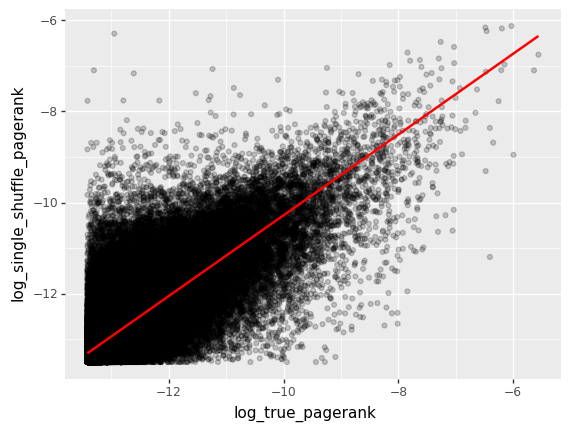

<ggplot: (8783548851297)>

In [8]:
plot = ggplot(merged_df, aes(x='log_true_pagerank', y='log_single_shuffle_pagerank')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot

In [9]:
data_dict = {'doi': [], 'pagerank': [], 'shuffle': []}
for i in range(100):
    with open(f'../output/shuffle_results/computational_biology-genetics-{i}-pagerank.pkl', 'rb') as in_file:
        pageranks = pkl.load(in_file)

    for doi, pagerank in pageranks.items():
        data_dict['doi'].append(doi)
        data_dict['pagerank'].append(pagerank)
        data_dict['shuffle'].append(i)

shuffle_df = pd.DataFrame(data_dict)

In [10]:
shuffle_df['log_pagerank'] = np.log(shuffle_df['pagerank'])
shuffle_df.groupby('doi').median()

,pagerank,shuffle,log_pagerank
doi,,,
10.1001/2012.jama.10820,0.000001,49.5,-13.452602
10.1001/amajethics.2018.834,0.000001,49.5,-13.481363
10.1001/amajethics.2018.873,0.000002,50.0,-13.365333
10.1001/archfami.2.11.1158,0.000002,49.5,-13.048853
10.1001/archfami.2.11.1179,0.000002,49.5,-12.960407
...,...,...,...
10.7861/clinmedicine.19-4-273,0.000002,50.5,-13.401734
10.7863/jum.2010.29.6.963,0.000001,49.5,-13.501729
10.7883/yoken.67.62,0.000004,49.5,-12.480043


In [11]:
shuffle_df.groupby('doi').std()

,pagerank,shuffle,log_pagerank
doi,,,
10.1001/2012.jama.10820,1.012220e-08,29.011492,0.007026
10.1001/amajethics.2018.834,7.555227e-09,29.011492,0.005404
10.1001/amajethics.2018.873,4.132248e-07,29.247265,0.153603
10.1001/archfami.2.11.1158,2.529919e-06,28.642648,0.361699
10.1001/archfami.2.11.1179,5.566513e-06,29.418576,0.565391
...,...,...,...
10.7861/clinmedicine.19-4-273,3.787507e-07,29.181163,0.184751
10.7863/jum.2010.29.6.963,7.399836e-09,29.011492,0.005397
10.7883/yoken.67.62,5.604593e-06,29.011492,0.572223


In [12]:
merged_df = cb_df.merge(shuffle_df.groupby('doi').median(), on='doi')
merged_df.rename({'pagerank_x': 'true_pagerank', 'log_pagerank_x': 'log_true_pagerank',
                  'pagerank_y': 'median_shuffle_pagerank', 'log_pagerank_y': 'log_median_shuffle_pagerank'},
                  axis='columns', inplace=True)
merged_df

,doi,true_pagerank,log_true_pagerank,median_shuffle_pagerank,shuffle,log_median_shuffle_pagerank
0,10.1038/ng0495-347,0.000182,-8.614134,0.000028,49.5,-10.500902
1,10.1038/35015718,0.000212,-8.460242,0.000089,49.5,-9.325740
2,10.1126/science.274.5287.536,0.000799,-7.131768,0.000054,49.5,-9.820543
3,10.3945/ajcn.110.001289,0.000002,-13.307770,0.000002,50.0,-13.295161
4,10.1017/s0007114508076253,0.000004,-12.521106,0.000003,49.5,-12.608961
...,...,...,...,...,...,...
196489,10.1155/2022/6192190,0.000001,-13.418357,0.000001,49.5,-13.501729
196490,10.1007/978-1-0716-2071-7_17,0.000001,-13.418357,0.000001,47.5,-13.502807
196491,10.1093/ndt/gfab320,0.000001,-13.418357,0.000001,50.5,-13.502061
196492,10.2174/1381612822666160907093215,0.000002,-13.389202,0.000001,49.5,-13.467882


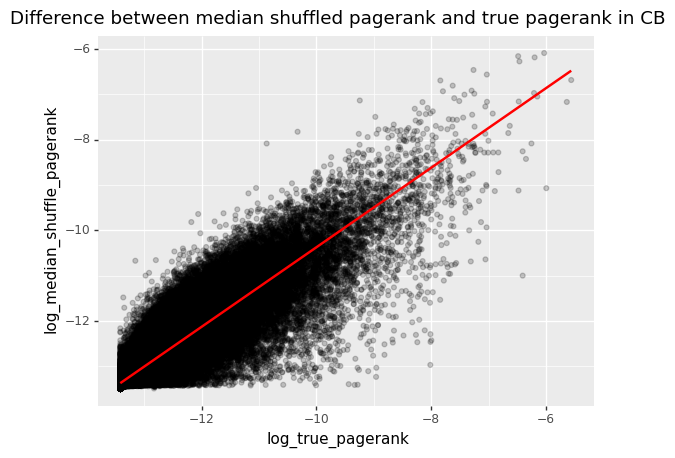

<ggplot: (8783548773253)>

In [13]:
plot = ggplot(merged_df, aes(x='log_true_pagerank', y='log_median_shuffle_pagerank')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot += ggtitle('Difference between median shuffled pagerank and true pagerank in CB')
plot

In [14]:
with open('../data/combined_networks/computational_biology-genetics.pkl', 'rb') as in_file:
    cb_network = pkl.load(in_file)

In [15]:
network_info = {'doi': [], 'in_degree': [], 'out_degree': []}
for doi in cb_network.nodes():
    network_info['doi'].append(doi)
    network_info['in_degree'].append(cb_network.in_degree(doi))
    network_info['out_degree'].append(cb_network.out_degree(doi))
    
node_degrees = pd.DataFrame(network_info)

In [16]:
degree_df = merged_df.merge(node_degrees, on='doi')
degree_df

,doi,true_pagerank,log_true_pagerank,median_shuffle_pagerank,shuffle,log_median_shuffle_pagerank,in_degree,out_degree
0,10.1038/ng0495-347,0.000182,-8.614134,0.000028,49.5,-10.500902,43,0
1,10.1038/35015718,0.000212,-8.460242,0.000089,49.5,-9.325740,98,0
2,10.1126/science.274.5287.536,0.000799,-7.131768,0.000054,49.5,-9.820543,88,1
3,10.3945/ajcn.110.001289,0.000002,-13.307770,0.000002,50.0,-13.295161,2,1
4,10.1017/s0007114508076253,0.000004,-12.521106,0.000003,49.5,-12.608961,7,10
...,...,...,...,...,...,...,...,...
196489,10.1155/2022/6192190,0.000001,-13.418357,0.000001,49.5,-13.501729,0,1
196490,10.1007/978-1-0716-2071-7_17,0.000001,-13.418357,0.000001,47.5,-13.502807,0,1
196491,10.1093/ndt/gfab320,0.000001,-13.418357,0.000001,50.5,-13.502061,0,1
196492,10.2174/1381612822666160907093215,0.000002,-13.389202,0.000001,49.5,-13.467882,1,0


In [17]:
degree_df['log_in_degree'] = np.log(degree_df['in_degree'])
degree_df['log_out_degree'] = np.log(degree_df['out_degree'])
degree_df['zero_citing'] = degree_df['in_degree'] < 1
degree_df['zero_cited'] = degree_df['out_degree'] < 1
degree_df['degree'] = degree_df['in_degree'] + degree_df['out_degree']

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log


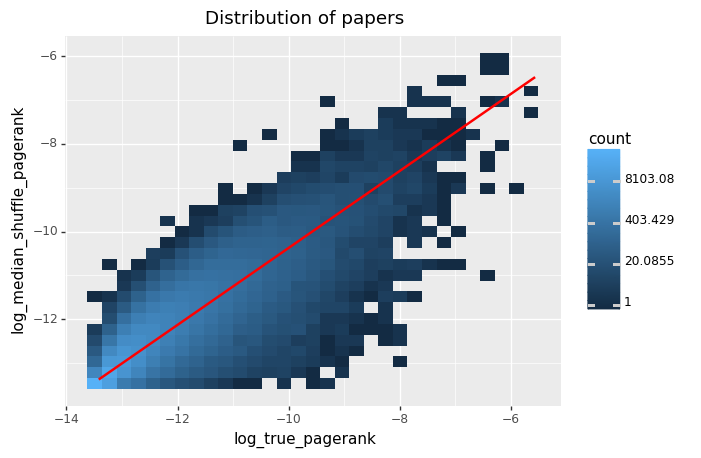

<ggplot: (8783548546967)>

In [18]:
plot = ggplot(degree_df, aes(x='log_true_pagerank', y='log_median_shuffle_pagerank'))
plot += geom_bin2d()
plot += geom_smooth(color='red')
plot += ggtitle('Distribution of papers')
plot += scale_fill_gradient( trans = 'log' )
plot

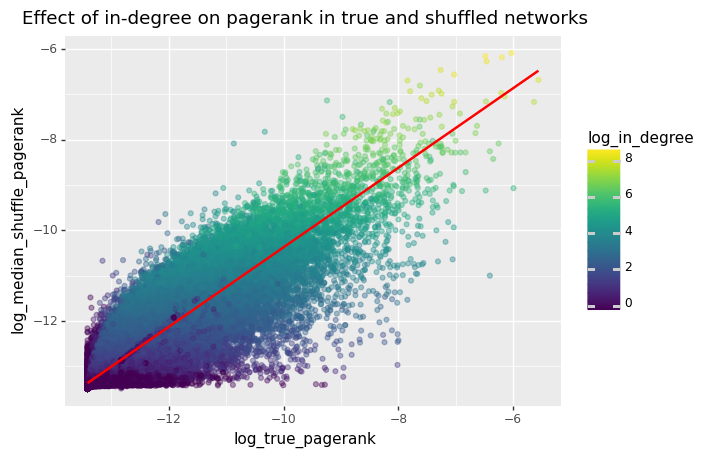

<ggplot: (8783548594161)>

In [19]:
plot = ggplot(degree_df, aes(x='log_true_pagerank', y='log_median_shuffle_pagerank', color='log_in_degree')) 
plot += geom_point(alpha=.4)
plot += geom_smooth(color='red')
plot += ggtitle('Effect of in-degree on pagerank in true and shuffled networks')
plot

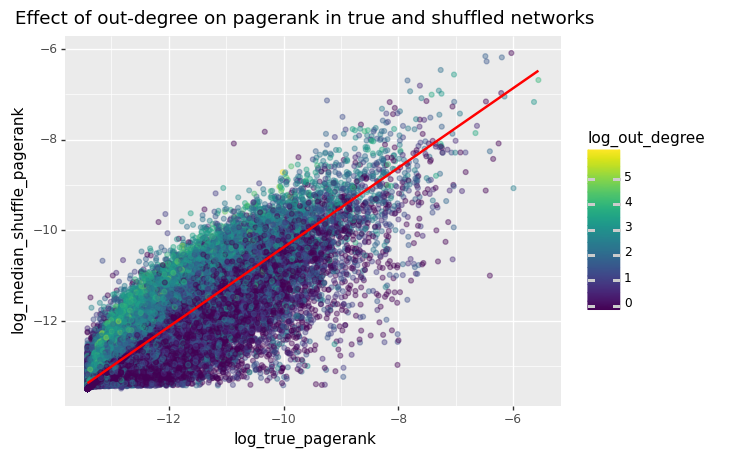

<ggplot: (8783548593990)>

In [20]:
plot = ggplot(degree_df, aes(x='log_true_pagerank', y='log_median_shuffle_pagerank', color='log_out_degree')) 
plot += geom_point(alpha=.4)
plot += geom_smooth(color='red')
plot += ggtitle('Effect of out-degree on pagerank in true and shuffled networks')
plot

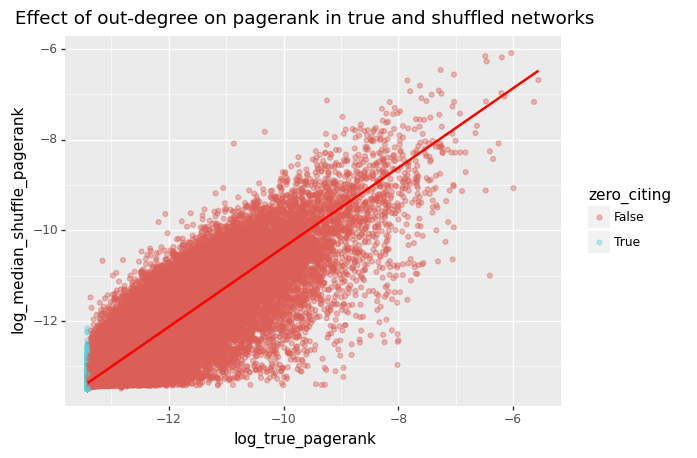

<ggplot: (8783367936949)>

In [21]:
plot = ggplot(degree_df, aes(x='log_true_pagerank', y='log_median_shuffle_pagerank', color='zero_citing')) 
plot += geom_point(alpha=.4)
plot += geom_smooth(color='red')
plot += ggtitle('Effect of out-degree on pagerank in true and shuffled networks')
plot

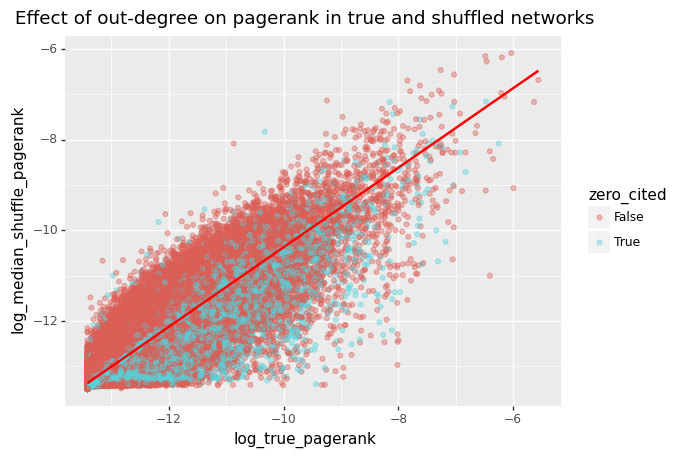

<ggplot: (8783370261799)>

In [22]:
plot = ggplot(degree_df, aes(x='log_true_pagerank', y='log_median_shuffle_pagerank', color='zero_cited')) 
plot += geom_point(alpha=.4)
plot += geom_smooth(color='red')
plot += ggtitle('Effect of out-degree on pagerank in true and shuffled networks')
plot

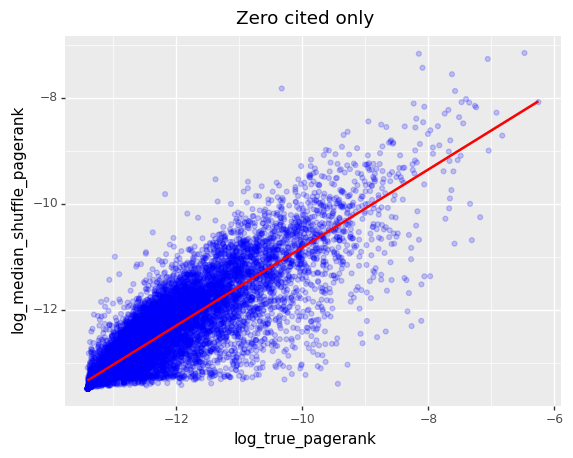

<ggplot: (8783536926429)>

In [23]:
plot = ggplot(degree_df[degree_df['zero_cited'] == True], aes(x='log_true_pagerank', y='log_median_shuffle_pagerank', color='zero_cited')) 
plot += geom_point(alpha=.2, color='blue')
plot += geom_smooth(color='red')
plot += ggtitle('Zero cited only')
plot

<AxesSubplot:>

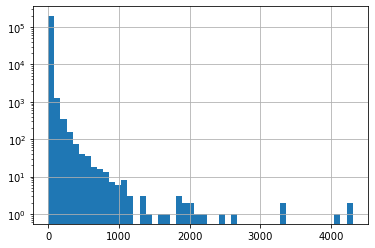

In [24]:
degree_df['in_degree'].hist(bins=50, log=True)

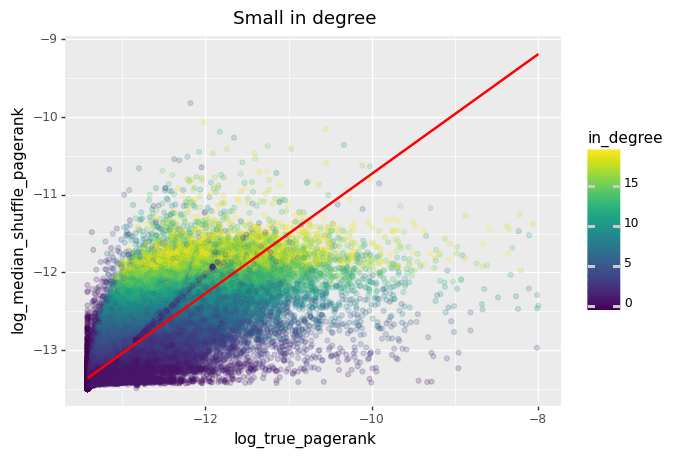

<ggplot: (8783369019059)>

In [25]:
plot = ggplot(degree_df[degree_df['in_degree'] < 20], aes(x='log_true_pagerank', y='log_median_shuffle_pagerank', color='in_degree')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot += ggtitle('Small in degree')
plot

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10


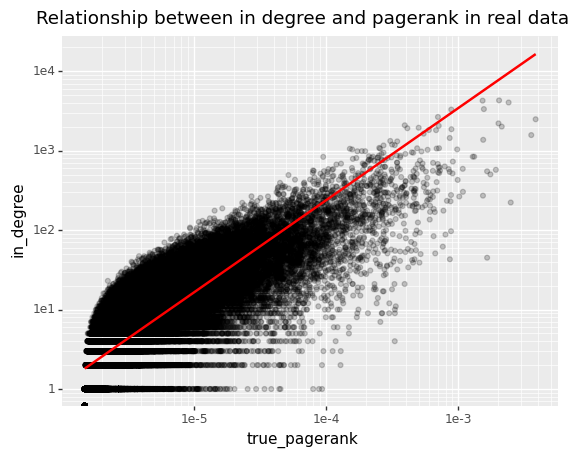

<ggplot: (8783288019134)>

In [26]:
plot = ggplot(degree_df, aes(x='true_pagerank', y='in_degree')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot += scale_y_log10()
plot += scale_x_log10()
plot += ggtitle('Relationship between in degree and pagerank in real data')
plot

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10


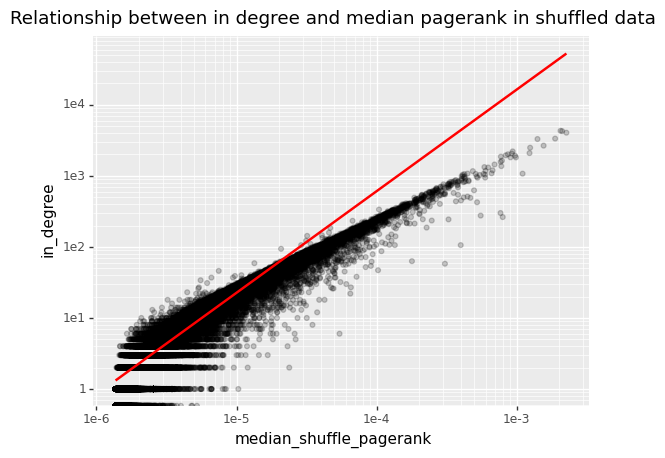

<ggplot: (8783369062665)>

In [27]:
plot = ggplot(degree_df, aes(x='median_shuffle_pagerank', y='in_degree')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot += scale_y_log10()
plot += scale_x_log10()
plot += ggtitle('Relationship between in degree and median pagerank in shuffled data')
plot

In [28]:
with open('../output/shuffle_results/computational_biology-genetics-42-pagerank.pkl', 'rb') as in_file:
    cb_g_pageranks = pkl.load(in_file)
data_dict = {'doi': [], 'pagerank': []}

for doi, pagerank in cb_g_pageranks.items():
    data_dict['doi'].append(doi)
    data_dict['pagerank'].append(pagerank)

shuffle_df = pd.DataFrame(data_dict)
shuffle_df['log_pagerank'] = np.log(shuffle_df['pagerank'])

merged_df = cb_df.merge(shuffle_df, on='doi')
merged_df.rename({'pagerank_x': 'true_pagerank', 'log_pagerank_x': 'log_true_pagerank',
                  'pagerank_y': 'single_shuffle_pagerank', 'log_pagerank_y': 'log_single_shuffle_pagerank'},
                 axis='columns', inplace=True)

single_df = merged_df.merge(node_degrees, on='doi')
single_df

,doi,true_pagerank,log_true_pagerank,single_shuffle_pagerank,log_single_shuffle_pagerank,in_degree,out_degree
0,10.1038/ng0495-347,0.000182,-8.614134,0.000029,-10.434893,43,0
1,10.1038/35015718,0.000212,-8.460242,0.000106,-9.150762,98,0
2,10.1126/science.274.5287.536,0.000799,-7.131768,0.000101,-9.202270,88,1
3,10.3945/ajcn.110.001289,0.000002,-13.307770,0.000003,-12.853971,2,1
4,10.1017/s0007114508076253,0.000004,-12.521106,0.000009,-11.607580,7,10
...,...,...,...,...,...,...,...
195008,10.1093/plphys/kiab466,0.000001,-13.418357,0.000001,-13.499631,0,1
195009,10.1155/2022/6192190,0.000001,-13.418357,0.000001,-13.499631,0,1
195010,10.1007/978-1-0716-2071-7_17,0.000001,-13.418357,0.000001,-13.499631,0,1
195011,10.2174/1381612822666160907093215,0.000002,-13.389202,0.000001,-13.467053,1,0


/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10


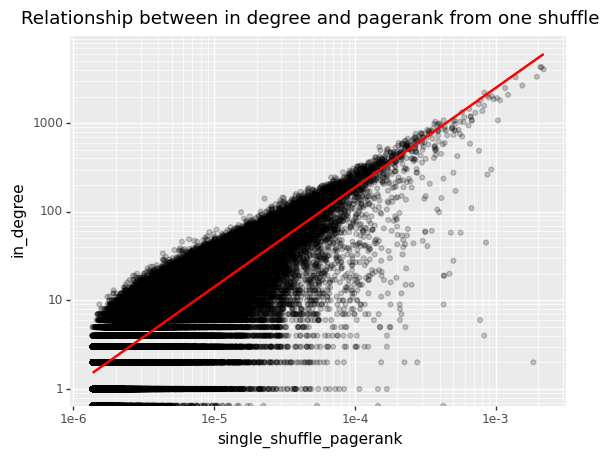

<ggplot: (8783281231990)>

In [29]:
plot = ggplot(single_df, aes(x='single_shuffle_pagerank', y='in_degree')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot += scale_y_log10()
plot += scale_x_log10()
plot += ggtitle('Relationship between in degree and pagerank from one shuffle')
plot

#### Result
The shuffled graph has a bit less variance at the end than the true pageranks. I think this is because shuffling networks disrupts community structure, causing pageranks to become more dependant on a given node's in-degree

In [30]:
degree_df['difference'] = degree_df['log_true_pagerank'] - degree_df['log_median_shuffle_pagerank']

In [31]:
degree_df.sort_values(by='difference')

,doi,true_pagerank,log_true_pagerank,median_shuffle_pagerank,shuffle,log_median_shuffle_pagerank,in_degree,out_degree,log_in_degree,log_out_degree,zero_citing,zero_cited,degree,difference
4526,10.1093/bioinformatics/bts460,0.000019,-10.867601,0.000308,49.5,-8.086944,58,1,4.060443,0.000000,False,False,59,-2.780657
7620,10.1093/bioinformatics/btm233,0.000033,-10.328347,0.000399,49.5,-7.827433,106,0,4.663439,-inf,False,True,106,-2.500914
33912,10.1021/es4017365,0.000002,-13.156471,0.000023,49.5,-10.673839,4,4,1.386294,1.386294,False,False,8,-2.482632
28036,10.1093/bioinformatics/btt763,0.000006,-12.060967,0.000065,49.5,-9.642507,22,3,3.091042,1.098612,False,False,25,-2.418460
7073,10.1093/jhered/93.2.153,0.000005,-12.180460,0.000054,49.5,-9.819581,6,0,1.791759,-inf,False,True,6,-2.360878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11965,10.1093/bioinformatics/btn565,0.000331,-8.013264,0.000005,49.5,-12.292633,10,4,2.302585,1.386294,False,False,14,4.279369
78845,10.1089/cmb.2005.12.407,0.000336,-7.997305,0.000004,49.5,-12.428667,11,1,2.397895,0.000000,False,False,12,4.431362
32039,10.1016/s0167-7799(01)01790-5,0.000331,-8.012695,0.000004,49.5,-12.463162,9,4,2.197225,1.386294,False,False,13,4.450467
27799,10.1002/jms.290,0.001652,-6.405627,0.000017,49.5,-11.001534,45,1,3.806662,0.000000,False,False,46,4.595906


<AxesSubplot:>

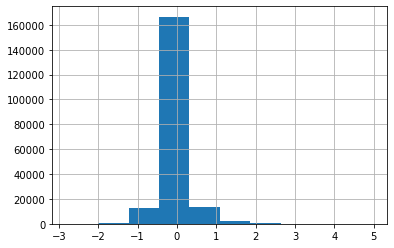

In [32]:
degree_df['difference'].hist()

## What is causing low pagerank papers to have high percentiles?

In [33]:
def calculate_percentiles(true_vals, doi_to_shuffled_metrics):
    dois, pageranks = [], []
    for doi, pagerank in true_vals.items():
        if pagerank is not None:
            dois.append(doi)
            pageranks.append(pagerank)
            
    percentiles = []
    for doi in dois:
        shuffled_metrics = doi_to_shuffled_metrics[doi]
        # If the node is unshuffleable for some reason, its percentile isn't meaningful
        if len(set(shuffled_metrics)) == 1:
            percentiles.append(None)
            continue
        true_val = true_vals[doi]
    
        percentile = np.searchsorted(shuffled_metrics, true_val) / 100
        percentiles.append(percentile)

    result_df = pd.DataFrame({'doi': dois, 'pagerank': pageranks, 'percentile': percentiles})
    return result_df

#@lru_cache(2)
def load_single_heading(heading_str):
    heading_shuffled = glob.glob(f'../output/shuffle_results/{heading_str}*-pagerank.pkl')

    doi_to_shuffled_metrics = {}

    for path in heading_shuffled:
        with open(path, 'rb') as in_file:
            result = pkl.load(in_file)
            for doi, value in result.items():
                if doi in doi_to_shuffled_metrics:
                    doi_to_shuffled_metrics[doi].append(value)
                else:
                    doi_to_shuffled_metrics[doi] = [value]
    for doi, vals in doi_to_shuffled_metrics.items():
        doi_to_shuffled_metrics[doi] = sorted(vals)
    
    with open(f'../output/{heading_str}-pagerank.pkl', 'rb') as in_file:
        true_vals = pkl.load(in_file)
        
    heading_df = calculate_percentiles(true_vals, doi_to_shuffled_metrics)
    return heading_df

def load_pair_headings(heading1, heading2):
    heading1_df = load_single_heading(f'{heading1}-{heading2}')
    heading2_df = load_single_heading(f'{heading2}-{heading1}')

    merged_df = heading1_df.merge(heading2_df, on='doi')
    merged_df = merged_df.rename({'pagerank_x': f'{heading1}_pagerank', 'pagerank_y': f'{heading2}_pagerank',
                                  'percentile_x': f'{heading1}_percentile', 'percentile_y': f'{heading2}_percentile'}, 
                                 axis='columns')
    merged_df[f'{heading1}-{heading2}'] = merged_df[f'{heading1}_percentile'] - merged_df[f'{heading2}_percentile']
    
    metadata_df = parse_metadata(f'../data/pubmed/efetch/{heading1}.xml.xz')
    full_df = merged_df.merge(metadata_df, on='doi')
    
    return full_df

In [34]:
merged_df = load_pair_headings('computational_biology', 'genetics')
merged_df

,doi,computational_biology_pagerank,computational_biology_percentile,genetics_pagerank,genetics_percentile,computational_biology-genetics,pmid,pmcid,journal,journal_nlm_id,title,publication_date,authors
0,10.1038/ng0495-347,0.000182,1.00,0.000166,1.00,0.00,7795639,None,Nat Genet,9216904,Positional cloning moves from perditional to t...,1995-04,"[{'fore_name': 'F S', 'last_name': 'Collins', ..."
1,10.1038/35015718,0.000212,1.00,0.000333,1.00,0.00,10866211,None,Nature,0410462,Searching for genetic determinants in the new ...,2000-06-15,"[{'fore_name': 'N J', 'last_name': 'Risch', 'a..."
2,10.1126/science.274.5287.536,0.000799,1.00,0.000226,1.00,0.00,8928008,None,Science,0404511,The new genomics: global views of biology.,1996-10-25,"[{'fore_name': 'E S', 'last_name': 'Lander', '..."
3,10.3945/ajcn.110.001289,0.000002,0.45,0.000002,0.49,-0.04,22049167,None,Am J Clin Nutr,0376027,Coevolution of nutrigenomics and society: ethi...,2011-11-02,"[{'fore_name': 'Michiel', 'last_name': 'Kortha..."
4,10.1017/s0007114508076253,0.000004,0.64,0.000003,0.65,-0.01,18828951,None,Br J Nutr,0372547,The good life: living for health and a life wi...,2008-10-02,"[{'fore_name': 'Rixt H', 'last_name': 'Komduur..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112005,10.1038/s41598-022-06668-9,0.000001,0.98,0.000002,0.95,0.03,35181682,PMC8857240,Sci Rep,101563288,Probing the antioxidant activity of functional...,2022-02-18,"[{'fore_name': 'Jiaxin', 'last_name': 'Lu', 'a..."
112006,10.11124/jbies-20-00516,0.000001,0.86,0.000002,0.83,0.03,34341310,PMC8728762,JBI Evid Synth,101764819,Prevalence of COVID-19 genomic variation in Af...,2021-08-02,"[{'fore_name': 'George', 'last_name': 'Adjei',..."
112007,10.7150/thno.61832,0.000002,1.00,0.000002,1.00,0.00,34335977,PMC8315065,Theranostics,101552395,Multi-omic profiling of plasma reveals molecul...,2021-07-06,"[{'fore_name': 'Chong', 'last_name': 'Wang', '..."
112008,10.1371/journal.pone.0202779,0.000002,1.00,0.000002,1.00,0.00,30133529,PMC6105017,PLoS One,101285081,Optimization of protein extraction and two-dim...,2018-08-22,"[{'fore_name': 'Roy Chi Ho', 'last_name': 'Cha..."


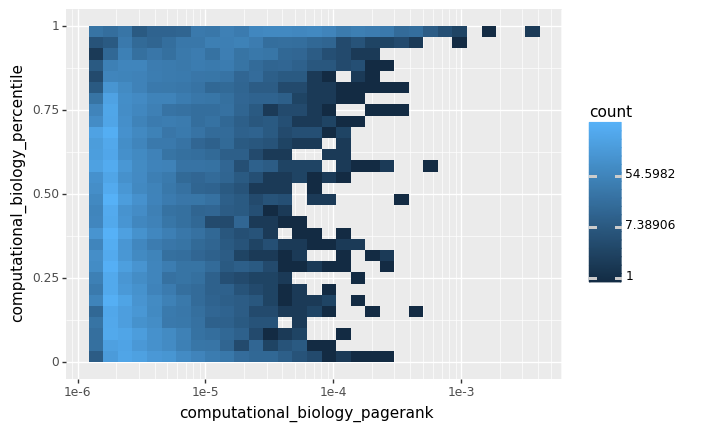

<ggplot: (8783285431696)>

In [42]:
plot = ggplot(merged_df[merged_df['computational_biology_pagerank'] > 1.488e-6], aes(x='computational_biology_pagerank', y='computational_biology_percentile'))
plot += geom_bin2d()
plot += scale_x_log10()
plot += scale_fill_gradient( trans = 'log' )
plot

In [36]:
merged_df = load_pair_headings('computational_biology', 'medical_informatics')

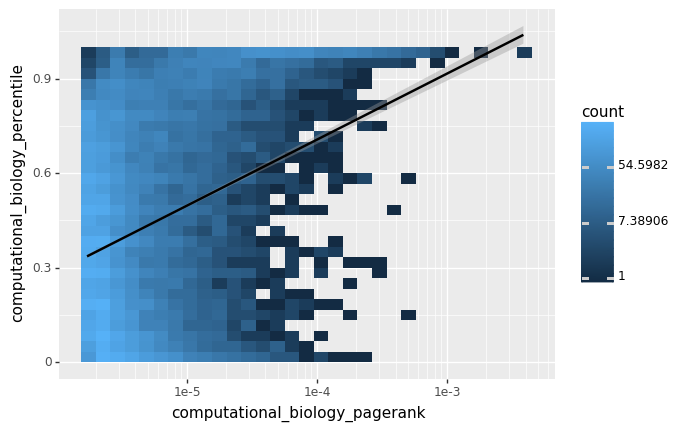

<ggplot: (8783282846114)>

In [37]:
plot = ggplot(merged_df[merged_df['computational_biology_pagerank'] >1.7e-6], aes(x='computational_biology_pagerank', y='computational_biology_percentile'))
plot += geom_bin2d()
plot += geom_smooth()
plot += scale_x_log10()
plot += scale_fill_gradient(trans='log')
plot

In [38]:
low_pagerank_df = merged_df[(merged_df['computational_biology_pagerank'] > 1.7e-6) & (merged_df['computational_biology_pagerank'] < 5e-6)]

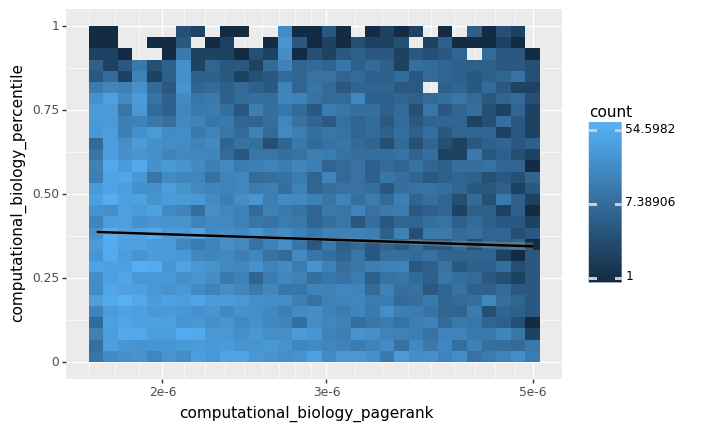

<ggplot: (8783546864178)>

In [39]:
plot = ggplot(low_pagerank_df, aes(x='computational_biology_pagerank', y='computational_biology_percentile'))
plot += geom_bin2d()
plot += geom_smooth()
plot += scale_x_log10()
plot += scale_fill_gradient(trans='log')
plot

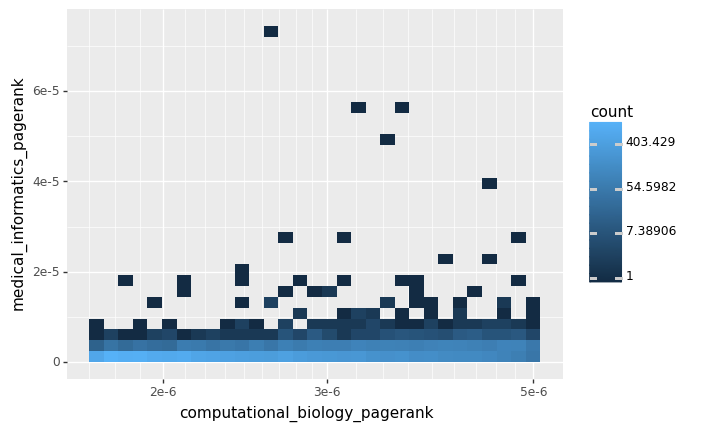

<ggplot: (8783288026353)>

In [40]:
plot = ggplot(low_pagerank_df, aes(x='computational_biology_pagerank', y='medical_informatics_pagerank'))
plot += geom_bin2d()
plot += scale_x_log10()
plot += scale_fill_gradient(trans='log')
plot